### Install libraries

In [ ]:
!pip install tensorflow==2.16.1

### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Import libraries


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, Input
from keras.layers import Dense, Normalization
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


matplotlib.rcParams['figure.figsize'] = [9, 6]
print(tf.__version__)

2.16.1


In [ ]:
SEED = 0
tf.random.set_seed(SEED)
np.random.seed(SEED)

### Load data

In [ ]:
df=pd.read_csv('h2_light.csv')
df

,Time,h2_light_100,h2_light_200,h2_light_300
0,0,0.000,0.000,0.000
1,18,0.000,0.000,0.000
2,21,0.000,0.000,0.000
3,25,0.000,0.000,0.000
4,30,0.000,0.000,0.000
5,42,0.000,0.000,0.000
6,45,0.000,0.000,0.000
7,49,0.000,0.000,0.000
8,54,0.285,1.055,1.105
9,66,1.490,1.665,2.960


In [ ]:
sns.pairplot(df[['h2_light_100', 'h2_light_200', 'h2_light_300']], diag_kind='auto')
plt.show()

### Helper functions

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  # plt.grid(True)
  plt.show()

# plt.scatter(x_train, y_train)

In [ ]:
# keras.utils.normalize(np.array(df), axis=-1, order=2)

### Neural network

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(1,), activation='linear'),
    tf.keras.layers.Dense(1,)
])

model.summary()

In [ ]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [ ]:
df.isna().sum()
# df = df.dropna()

Time            0
h2_light_100    0
h2_light_200    0
h2_light_300    0
dtype: int64

In [ ]:
# df.shape

In [ ]:
# df.describe()

In [ ]:
%%time
# X = np.linspace(0, 10, 100)
# Y = 2 * X + 1 + np.random.randn(100)
X = df['Time']
Y = df['h2_light_100']
SPLIT=int(X.shape[0] * 0.9)
x_train = X[:SPLIT]
y_train = Y[:SPLIT]
x_test = X[SPLIT:]
y_test = Y[SPLIT:]

CPU times: user 509 µs, sys: 0 ns, total: 509 µs
Wall time: 535 µs


In [ ]:
# df.describe().transpose()[['mean', 'std']]

In [ ]:
%%time
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error',
    metrics=["mae"]
    )

history = model.fit(
    x_train,
    y_train,
    epochs=100,
    validation_split=0.2,
    verbose=1
    )

In [ ]:

scores = model.evaluate(x_test, y_test, verbose=1)

# print("Test loss:", scores[0])
# print("Test accuracy:", scores[1] * 100)

# X_test = np.array([11, 12, 13])
# Y_pred = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 392.8156 - mae: 19.6112


In [ ]:
hist_df = pd.DataFrame(history.history)
# hist_df['accuracy'].max()

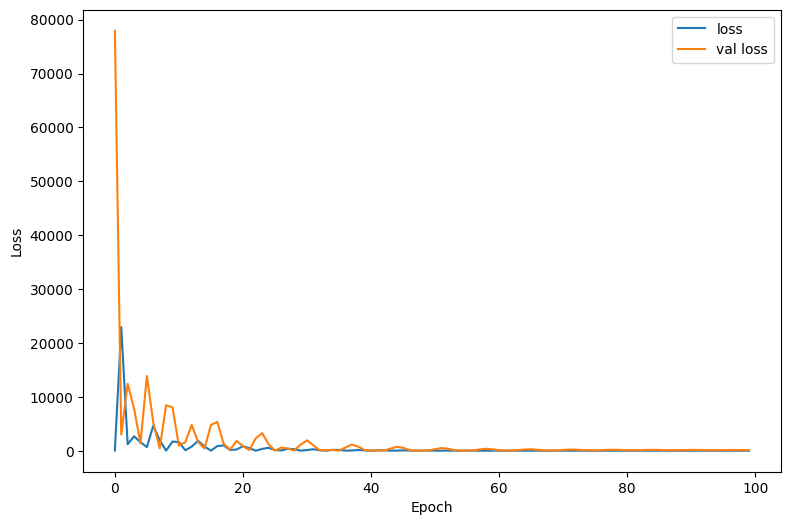

In [ ]:
plot_loss(history)